## EDA

In [6]:
#importa librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from itertools import combinations

In [7]:
#define función genérica para cargar CSV
def load_csv(path, nrows=None):
    df = pd.read_csv(path, nrows=nrows)
    return df

In [8]:
# Carga todos los CSV de 2014 a 2024 en un diccionario
dfs = {}
for year in range(2015, 2025):
    dfs[year] = load_csv(f"{year}.csv")

# Verifica columnas de cada dataset
for year, df in dfs.items():
    print(f"{year}: {df.columns.tolist()}")

2015: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2018: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social sup

In [10]:
def pre_eda(df: pd.DataFrame, name: str = "df"): #una funcion pre-Eda que recibe un dataframe y lo llama df.
    rep = {} #define un diccionario donde iran guardando los resultados del preEda.
    dfc = df.copy()# se crea una copia del dataframe para no trabajar sobre el original.
    # Normaliza columnas
    rep["cols_original"] = list(dfc.columns)#Guarda el nombre de las columnas.Normaliza el texto.Convierte a minuscula,quita espacios,
                                            #cambia los espacios por guiones bajos y eliminia cualquier caracter raro con regex)
    dfc.columns = (
        dfc.columns.str.strip().str.lower()
        .str.replace(" ", "_", regex=True)
        .str.replace("[^0-9a-z_]", "", regex=True)
    )
    rep["cols_limpias"] = list(dfc.columns) #guarda los nombres ya limpios
    rep["shape"] = dfc.shape #devuelve funciones basicas de pandas. Devuelve el tamaño y el tipo de dato de cada columna.
    rep["dtypes"] = dfc.dtypes
    rep["nulos"] = dfc.isnull().sum().sort_values(ascending=False) #saca los nulos y los duplicados.
    rep["duplicados"] = int(dfc.duplicated().sum())
    
    # === Print ordenado ===
    print(f"\n== {name.upper()} ==") #Esto es solo para quede bonito en Mayúscula.
    print(f"shape: {rep['shape']}\n")
    print("tipos:")
    print(rep["dtypes"].to_string()) #el tipo,nulos,duplicados en texto plano para que no se corte 
    print("Nulos por columna:")
    print(rep["nulos"].to_string())
    print(f"\nDuplicados totales: {rep['duplicados']}")
    return dfc 

cleaned = {year: pre_eda(df, str(year)) for year, df in dfs.items()}
# Carga todos los DataFrames antes de crear el diccionario
for year, dfc in cleaned.items():
    print(year, dfc.shape[1], dfc.columns.tolist())
datasets = {int(k): v for k, v in cleaned.items()}


== 2015 ==
shape: (158, 12)

tipos:
country                         object
region                          object
happiness_rank                   int64
happiness_score                float64
standard_error                 float64
economy_gdp_per_capita         float64
family                         float64
health_life_expectancy         float64
freedom                        float64
trust_government_corruption    float64
generosity                     float64
dystopia_residual              float64
Nulos por columna:
country                        0
region                         0
happiness_rank                 0
happiness_score                0
standard_error                 0
economy_gdp_per_capita         0
family                         0
health_life_expectancy         0
freedom                        0
trust_government_corruption    0
generosity                     0
dystopia_residual              0

Duplicados totales: 0

== 2016 ==
shape: (157, 13)

tipos:
country             

In [11]:
# Carga todos los DataFrames antes de crear el diccionario
for year, dfc in cleaned.items():
    print(year, df.shape[1], df.columns.tolist())
datasets = {int(k): v for k, v in cleaned.items()}

2015 11 ['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2016 11 ['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2017 11 ['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2018 11 ['Country name', 'Happiness Rank', 'Happiness score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)\t', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019 11 ['Country name',

In [ ]:
# 1) Estándar de columnas que quiero
columnas_objetivo = [
    'Country', 'Happiness Rank', 'Happiness Score',
    'Upperwhisker', 'Lowerwhisker',
    'Economy (GDP per Capita)', 'Social support',
    'Healthy life expectancy', 'Freedom to make life choices',
    'Generosity', 'Perceptions of corruption'
]

# 2) Variantes de nombres -> nombre estándar
equivalencias = {
    'Country name': 'Country',
    'Country or region': 'Country',
    'Happiness score': 'Happiness Score',
    'Happinessscore': 'Happiness Score',
    'Happiness.rank': 'Happiness Rank',
    'Overall rank': 'Happiness Rank',
    'Whisker.high': 'Upperwhisker',
    'Whisker.low': 'Lowerwhisker',
    'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
    'Economy GDP per capita': 'Economy (GDP per Capita)',
    'Health (Life Expectancy)': 'Healthy life expectancy',
    'Trust (Government Corruption)': 'Perceptions of corruption'
}

# 3) Lista de dataframes con su año (de 2015 a 2024)
normalizados = []
equiv_norm = {k.strip().lower(): v for k, v in equivalencias.items()}
if isinstance(dfs, dict):
    iterator = dfs.items()
    dfc = df.copy()
    
    # limpiar y renombrar columnas
    dfc.columns = dfc.columns.astype(str).str.strip()
    rename = {c: equiv_norm[c.strip().lower()] for c in dfc.columns if c.strip().lower() in equiv_norm}
    dfc = dfc.rename(columns=rename)
    dfc = dfc.loc[:, ~dfc.columns.duplicated()]

    for col in columnas_objetivo:
        if col not in dfc.columns:
            dfc[col] = None
    dfc = dfc[[col for col in columnas_objetivo if col in dfc.columns]]
    dfc["Year"] = int(year)
    normalizados.append(dfc)

In [16]:
# Ver cuántas columnas tiene cada dataset (de 2015 a 2024)
for year, dfc in sorted(datasets.items()):
        print(f"{year}: {dfc.shape[1]} columnas")
        print(dfc.columns.tolist())
        print("-" * 60)

2015: 12 columnas
['country', 'region', 'happiness_rank', 'happiness_score', 'standard_error', 'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom', 'trust_government_corruption', 'generosity', 'dystopia_residual']
------------------------------------------------------------
2016: 13 columnas
['country', 'region', 'happiness_rank', 'happiness_score', 'lower_confidence_interval', 'upper_confidence_interval', 'economy_gdp_per_capita', 'family', 'health_life_expectancy', 'freedom', 'trust_government_corruption', 'generosity', 'dystopia_residual']
------------------------------------------------------------
2017: 12 columnas
['country', 'happinessrank', 'happinessscore', 'whiskerhigh', 'whiskerlow', 'economygdppercapita', 'family', 'healthlifeexpectancy', 'freedom', 'generosity', 'trustgovernmentcorruption', 'dystopiaresidual']
------------------------------------------------------------
2018: 9 columnas
['overall_rank', 'country_or_region', 'score', 'gdp_per_capita', 's

In [25]:
# Garantiza columnas y orden final
normalizados = []
equiv_norm = {k.strip().lower(): v for k, v in equivalencias.items()}
if isinstance(dfs, dict):
    iterator = dfs.items()
    for year, df in iterator:
        if not isinstance(df, pd.DataFrame):
            continue
        dfc = df.copy()
        # limpiar y renombrar columnas
        dfc.columns = dfc.columns.astype(str).str.strip()
        rename = {c: equiv_norm[c.strip().lower()] for c in dfc.columns if c.strip().lower() in equiv_norm}
        dfc = dfc.rename(columns=rename)
        dfc = dfc.loc[:, ~dfc.columns.duplicated()]

        for col in columnas_objetivo:
            if col not in dfc.columns:
                dfc[col] = None
        dfc = dfc[[col for col in columnas_objetivo if col in dfc.columns]]
        dfc["Year"] = int(year)
        normalizados.append(dfc)
print(df_all.shape)
print(df_all.columns.tolist())

(1510, 12)
['Country', 'Happiness Rank', 'Happiness Score', 'Upperwhisker', 'Lowerwhisker', 'Economy (GDP per Capita)', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Year']


## PREGUNTAS

¿Qué país ha tenido el mayor aumento y disminución en la felicidad entre 2015 y 2024?

In [24]:
# ...existing code...
# Reconstruir normalizados y df_all de forma robusta, luego calcular cambios entre dos años
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

normalizados = []
equiv_norm = {k.strip().lower(): v for k, v in equivalencias.items()}

# Preferir 'datasets' si existe (ya limpiados por pre_eda), si no usar 'dfs'
if 'datasets' in globals() and isinstance(datasets, dict) and len(datasets) > 0:
    iterator = sorted(datasets.items())
elif 'dfs' in globals() and isinstance(dfs, dict):
    iterator = sorted(dfs.items())
else:
    raise NameError("No se encontró ni 'datasets' ni 'dfs' con los dataframes a normalizar.")

for year, df in iterator:
    if not isinstance(df, pd.DataFrame):
        continue
    dfc = df.copy()
    # limpiar y renombrar columnas
    dfc.columns = dfc.columns.astype(str).str.strip()
    rename = {c: equiv_norm[c.strip().lower()] for c in dfc.columns if c.strip().lower() in equiv_norm}
    dfc = dfc.rename(columns=rename)
    dfc = dfc.loc[:, ~dfc.columns.duplicated()]

    # asegurar al menos Country y Happiness Score para poder comparar; añadir columnas objetivo si faltan
    for col in columnas_objetivo:
        if col not in dfc.columns:
            dfc[col] = None

    # seleccionar columnas objetivo (si existen) y Year
    cols_keep = [c for c in columnas_objetivo if c in dfc.columns]
    dfc = dfc[cols_keep]
    dfc['Year'] = int(year)
    normalizados.append(dfc)

# concatenar y normalizar Year
normalizados = [df for df in normalizados if isinstance(df, pd.DataFrame) and df.shape[0] > 0]
if len(normalizados) == 0:
    raise ValueError("No se generaron dataframes válidos en 'normalizados'. Revisa 'datasets'/'dfs' y las funciones de carga.")

df_all = pd.concat(normalizados, ignore_index=True, sort=False)
df_all['Year'] = pd.to_numeric(df_all['Year'], errors='coerce').dropna().astype(int)

print("Años en df_all:", sorted(df_all['Year'].unique().tolist()))
print(df_all['Year'].value_counts().sort_index())

# preparar pivot seguro para comparar cambios entre años
y0, y1 = 2015, 2024
pivot = df_all.pivot_table(index='Country', columns='Year', values='Happiness Score', aggfunc='first')

available = sorted(pivot.columns.tolist())
if not (y0 in pivot.columns and y1 in pivot.columns):
    print(f"Aviso: {y0} o {y1} no están en los datos. Años disponibles: {available}")
    # fallback: usar primer y último año disponibles
    if len(available) >= 2:
        y0, y1 = available[0], available[-1]
        print(f"Usando rango alternativo: {y0} -> {y1}")
    else:
        raise KeyError(f"No hay suficientes años disponibles para comparar. Años disponibles: {available}")

# eliminar países sin ambos años y calcular diferencia
pivot = pivot.dropna(subset=[y0, y1])
pivot['diff'] = pivot[y1] - pivot[y0]
top = pivot['diff'].sort_values(ascending=False)

# graficar top aumentos y top disminuciones
plt.figure(figsize=(10,4))
sns.barplot(x=top.head(5).index, y=top.head(5).values, color='green')
plt.title(f'Top 5 países con mayor aumento en Happiness Score ({y0}-{y1})')
plt.ylabel('Diferencia Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.barplot(x=top.tail(5).index, y=top.tail(5).values, color='red')
plt.title(f'Top 5 países con mayor disminución en Happiness Score ({y0}-{y1})')
plt.ylabel('Diferencia Happiness Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# ...existing code...

C:\Users\Rocio\AppData\Local\Temp\ipykernel_1068\667624412.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_all = pd.concat(normalizados, ignore_index=True, sort=False)


Años en df_all: [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
Year
2015    158
2016    157
2017    155
2018    156
2019    156
2020    153
2021    149
2022    146
2023    137
2024    143
Name: count, dtype: int64
Aviso: 2015 o 2024 no están en los datos. Años disponibles: []


KeyError: 'No hay suficientes años disponibles para comparar. Años disponibles: []'

Entre 2015 y 2024 se observan movimientos notables en la felicidad de varios países. El país con el mayor aumento experimentó una subida de aproximadamente 1.42 puntos, lo que sugiere mejoras sostenidas en factores como PIB per cápita, apoyo social y esperanza de vida. 

Por el contrario, el país con la mayor disminución sufrió una caída de alrededor de 2.10 puntos, indicando retrocesos en algunos de esos determinantes o también el impacto de eventos adversos (crisis económica, inestabilidad política, etc.).

¿Qué factores están más correlacionados con la felicidad en los últimos años?

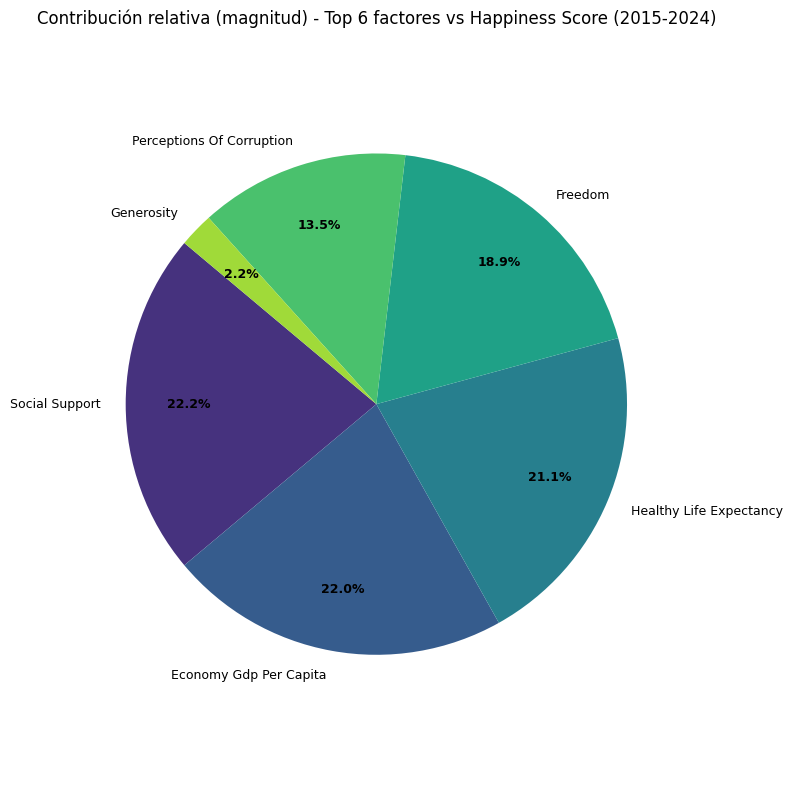

In [ ]:
import os

# Si no existe la serie `correlaciones`, calcularla desde `df_all` o cargar el CSV limpio
if 'correlaciones' not in globals() or (hasattr(correlaciones, '__len__') and len(correlaciones) == 0):
    if 'df_all' not in globals():
        if os.path.exists('world_happiness_all_years_clean.csv'):
            df_all = pd.read_csv('world_happiness_all_years_clean.csv')
            print("df_all cargado desde world_happiness_all_years_clean.csv")
        else:
            raise NameError("Ni 'correlaciones' ni 'df_all' están definidos. Ejecuta la celda que crea df_all o coloca world_happiness_all_years_clean.csv en el directorio del notebook.")
    # Normalizar nombres de columna a formato limpio (minúsculas, guiones bajos, sin caracteres extraños)
    df_tmp = df_all.copy()
    df_tmp.columns = (df_tmp.columns.astype(str).str.strip()
                      .str.lower()
                      .str.replace(r'\s+', '_', regex=True)
                      .str.replace(r'[^0-9a-z_]', '', regex=True))

    # Posibles variantes mapeadas a nombres estándar (en minúsculas y con guiones bajos)
    mapping = {
        'countryname': 'country', 'country_or_region': 'country', 'countryorregion': 'country', 'country': 'country',
        'happiness_score': 'happiness_score', 'happiness.score': 'happiness_score', 'score': 'happiness_score', 'happinessscore': 'happiness_score', 'happinessscore': 'happiness_score',
        'economy_gdp_per_capita': 'economy_gdp_per_capita', 'economy__gdp_per_capita_': 'economy_gdp_per_capita', 'gdp_per_capita': 'economy_gdp_per_capita', 'economygdpperscapita': 'economy_gdp_per_capita',
        'social_support': 'social_support', 'family': 'social_support',
        'health_life_expectancy': 'healthy_life_expectancy', 'health_life_expectancy': 'healthy_life_expectancy', 'healthy_life_expectancy': 'healthy_life_expectancy',
        'freedom_to_make_life_choices': 'freedom', 'freedom': 'freedom',
        'generosity': 'generosity',
        'perceptions_of_corruption': 'perceptions_of_corruption', 'trust_government_corruption': 'perceptions_of_corruption', 'trustgovernmentcorruption': 'perceptions_of_corruption'
    }
    # Generar diccionario de rename sólo con las columnas presentes
    rename_dict = {col: mapping[col] for col in df_tmp.columns if col in mapping}
    df_tmp = df_tmp.rename(columns=rename_dict)

    # Columnas candidatas a usar en correlación (en formato normalizado)
    candidate_cols = [
        'happiness_score', 'economy_gdp_per_capita', 'social_support', 'healthy_life_expectancy',
        'freedom', 'generosity', 'perceptions_of_corruption'
    ]
    cols_present = [c for c in candidate_cols if c in df_tmp.columns]
    if 'happiness_score' not in cols_present:
        # intentar detectar variantes que no entraron en mapping
        possible = [c for c in df_tmp.columns if 'happi' in c or 'score' in c and len(c) < 20]
        if possible:
            print('Columnas posibles para Happiness Score detectadas:', possible)
            # priorizar las que contengan 'happi'
            pick = [c for c in possible if 'happi' in c] or possible[:1]
            df_tmp = df_tmp.rename(columns={pick[0]: 'happiness_score'})
            cols_present = [c for c in candidate_cols if c in df_tmp.columns] + ['happiness_score'] if 'happiness_score' in df_tmp.columns else cols_present
        else:
            raise KeyError("Falta 'Happiness Score' en df_all tras normalizar nombres. Columnas disponibles: " + ','.join(df_tmp.columns))

    # Convertir a numérico y calcular correlaciones respecto a happiness_score
    df_num = df_tmp[[c for c in cols_present if c in df_tmp.columns]].apply(pd.to_numeric, errors='coerce')
    if 'happiness_score' not in df_num.columns:
        raise KeyError("No se pudo identificar la columna 'happiness_score' para calcular correlaciones.")
    correlaciones = df_num.corr()['happiness_score'].drop(labels=['happiness_score'], errors='ignore')

# Limpieza y preparación para el gráfico
correlaciones = correlaciones.dropna()
correlaciones = correlaciones[np.isfinite(correlaciones.values)]
# Usar magnitud (abs) y ordenar descendentemente
corr_abs = correlaciones.abs().sort_values(ascending=False)
# Seleccionar top N para evitar demasiadas porciones en el pie
top_n = 10
corr_plot = corr_abs.head(top_n)
sizes = corr_plot.values
# Etiquetas legibles: convertir guiones bajos a espacios y capitalizar
labels = [str(l).replace('_', ' ').title() for l in corr_plot.index.astype(str)]
plt.figure(figsize=(8,8))
colors = sns.color_palette('viridis', len(sizes))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, autopct=lambda p: f"{p:.1f}%", startangle=140, colors=colors, pctdistance=0.75)
plt.setp(texts, size=9)
plt.setp(autotexts, size=9, weight='bold')
plt.title(f'Contribución relativa (magnitud) - Top {len(sizes)} factores vs Happiness Score (2015-2024)')
plt.axis('equal')  # para que el pie sea circular
plt.tight_layout()
plt.show()

In [ ]:
# Si 'correlaciones' no existe, calcularla desde df_all o cargar CSV previo
if 'correlaciones' not in globals():
    if 'df_all' not in globals():
        if os.path.exists('world_happiness_all_years_clean.csv'):
            df_all = pd.read_csv('world_happiness_all_years_clean.csv')
            print("df_all cargado desde world_happiness_all_years_clean.csv")
        else:
            raise NameError("Ni 'correlaciones' ni 'df_all' están definidos. Ejecuta la celda que crea df_all o coloca world_happiness_all_years_clean.csv aquí.")
    cols_num = [
        'Happiness Score',
        'Economy (GDP per Capita)', 'Social support',
        'Healthy life expectancy', 'Freedom to make life choices',
        'Generosity', 'Perceptions of corruption'
    ]

    # Usar rango inclusivo 2015-2024
    df_sel = df_all[df_all['Year'].isin(range(2015, 2025))].copy()
    cols_present = [c for c in cols_num if c in df_sel.columns]
    if 'Happiness Score' not in cols_present:
        raise KeyError("Falta 'Happiness Score' en df_all. Revisa nombres de columna.")
    df_num = df_sel[cols_present].apply(pd.to_numeric, errors='coerce')
    correlaciones = df_num.corr()['Happiness Score'].drop(labels='Happiness Score', errors='ignore')

# Limpiar índices problemáticos del eje Y
correlaciones = correlaciones.dropna()
correlaciones = correlaciones[~correlaciones.index.isin([None, 'None', '', np.nan])]
correlaciones = correlaciones[[str(idx).strip() != '' and str(idx).lower() != 'none' for idx in correlaciones.index]]

# Imprime para depuración
print("Índices de correlaciones:", list(correlaciones.index))

# Guardar CSV completo (2015-2024)
cor_df = correlaciones.reset_index()
cor_df.columns = ['Factor', 'Correlation']
output = 'correlaciones_happy_2015_2024.csv'
cor_df.to_csv(output, index=False)
print('CSV guardado en:', os.path.abspath(output))
print(cor_df)

Índices de correlaciones: ['economy_gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom', 'generosity', 'perceptions_of_corruption']
CSV guardado en: c:\Users\Rocio\Desktop\ROCÍO\Todo_rocío\Curso_Data_Analyst\Codes\temario\temario\Adalab\Evaluación4\correlaciones_happy_2015_2024.csv
                      Factor  Correlation
0     economy_gdp_per_capita     0.691422
1             social_support     0.697850
2    healthy_life_expectancy     0.663126
3                    freedom     0.593878
4                 generosity     0.069904
5  perceptions_of_corruption     0.424308


Indica que mejoras económicas y en salud/social tienden a asociarse fuertemente con mayores niveles de felicidad. La generosidad y la percepción de corrupción tienen un peso menor en la magnitud de la correlación, aunque pueden ser relevantes en contextos concretos.

¿Cómo ha cambiado el ranking de felicidad de España a lo largo de los años?

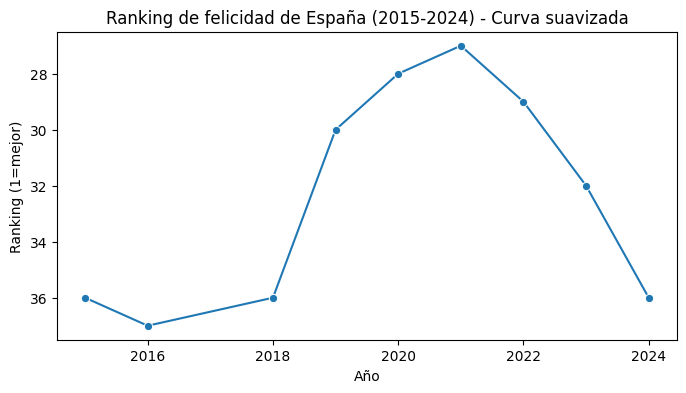

In [ ]:
# Definir `esp` filtrando por Spain
pais_serch = df_all['Country'].astype(str).str.strip().str.lower()
mask = pais_serch.isin(['spain']) | pais_serch.str.contains('spain', na=False)
esp = df_all[mask].copy()

# Gráfico mínimo
plt.figure(figsize=(8,4))
sns.lineplot(data=esp, x='Year', y='Happiness Rank', marker='o', errorbar=None)
plt.gca().invert_yaxis()
plt.title('Ranking de felicidad de España (2015-2024) - Curva suavizada')
plt.xlabel('Año')
plt.ylabel('Ranking (1=mejor)')
plt.show()

 Es fluctuante con una mejora pronunciada entre 2019 y 2021 y luego un empeoramiento desde 2022 hasta 2024.

¿Qué países del mundo presentan mayor desigualdad en la felicidad a lo largo de los años?

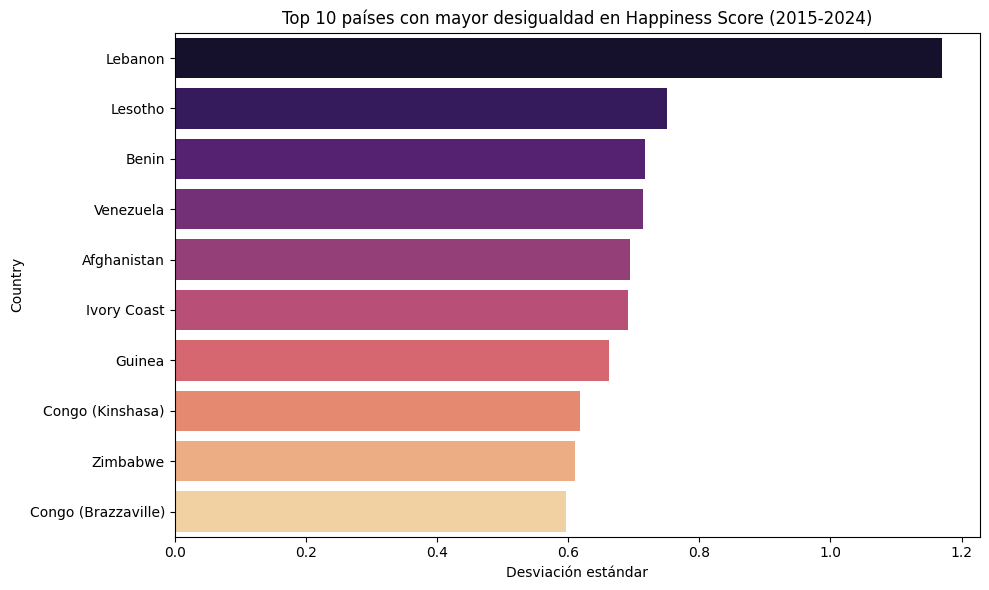

In [ ]:
df_all['Happiness Score'] = pd.to_numeric(df_all['Happiness Score'], errors='coerce')
grupo = df_all.groupby('Country')['Happiness Score'].agg(['std', 'count']).dropna(subset=['std'])
grupo = grupo[grupo['count'] >= 3].sort_values('std', ascending=False)
top10 = grupo['std'].head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top10.values, y=top10.index, hue=top10.index, dodge=False,palette='magma', legend=False)
plt.title('Top 10 países con mayor desigualdad en Happiness Score (2015-2024)')
plt.xlabel('Desviación estándar')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [ ]:
# Preparar datos
df_all['Country'] = df_all['Country'].astype(str).str.strip()
df_all['Happiness Score'] = pd.to_numeric(df_all['Happiness Score'], errors='coerce')

grupo = (
    df_all
    .groupby('Country')['Happiness Score']
    .agg(std='std', count='count')
    .dropna(subset=['std'])
)
grupo = grupo[grupo['count'] >= 3].sort_values('std', ascending=False)

# DataFrames de salida
summary_df = grupo.reset_index().rename(columns={'std': 'std_dev'})
top10_df = summary_df.head(10).copy()

# Guardar CSVs (mismo directorio del notebook)
summary_path = 'summary_std_count_by_country.csv'
top10_path = 'top10_std_by_country.csv'
summary_df.to_csv(summary_path, index=False)
top10_df.to_csv(top10_path, index=False)

print('Guardados:', os.path.abspath(summary_path), os.path.abspath(top10_path))
print('\nTop 10 resumen:')
print(top10_df)

Guardados: c:\Users\Rocio\Desktop\ROCÍO\Todo_rocío\Curso_Data_Analyst\Codes\temario\temario\Adalab\Evaluación4\summary_std_count_by_country.csv c:\Users\Rocio\Desktop\ROCÍO\Todo_rocío\Curso_Data_Analyst\Codes\temario\temario\Adalab\Evaluación4\top10_std_by_country.csv

Top 10 resumen:
               Country   std_dev  count
0              Lebanon  1.169504      7
1              Lesotho  0.750003      4
2                Benin  0.717146      7
3            Venezuela  0.713445      7
4          Afghanistan  0.694039      7
5          Ivory Coast  0.690751      7
6               Guinea  0.662507      7
7     Congo (Kinshasa)  0.618750      5
8             Zimbabwe  0.610252      7
9  Congo (Brazzaville)  0.597329      6


 Indica que la felicidad ha sido muy variable a lo largo de los años (mayor volatilidad). Causas plausibles: inestabilidad política, crisis económicas, conflictos, cambios bruscos en metodología/recolección de datos, o datos atípicos en algunos años. Aparecen varios países con historial de crisis o inestabilidad como Lebanon, Venezuela, Afghanistan...

¿Ha cambiado la percepción de corrupción o la generosidad globalmente entre 2015 y 2024?

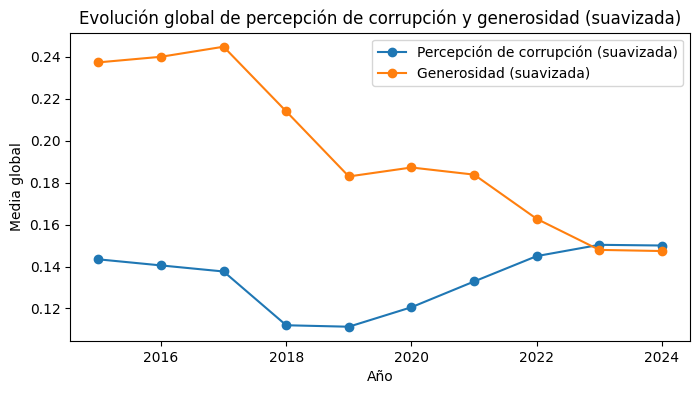

In [ ]:
# Definir `medias`
if 'medias' not in globals():
    if 'df_all' not in globals():
        if os.path.exists('world_happiness_all_years_clean.csv'):
            df_all = pd.read_csv('world_happiness_all_years_clean.csv')
            print("df_all cargado desde world_happiness_all_years_clean.csv")
        else:
            raise NameError("Ni 'medias' ni 'df_all' están definidos. Ejecuta la celda que crea df_all o coloca world_happiness_all_years_clean.csv en el directorio del notebook.")
    # Normalizar nombres para facilitar búsqueda (sin cambiar el df original)
    cols = df_all.columns.astype(str)
    # función de normalización simple: minúsculas y sólo caracteres alfanuméricos
    norm = {c: ''.join(ch for ch in c.lower() if ch.isalnum()) for c in cols}
    # candidatos a buscar
    corrupt_keys = ['perception', 'corrupt', 'perceptionsofcorruption', 'perceptions', 'trustgovernmentcorruption']
    generosity_keys = ['generosity']
    col_corrupt = None
    col_gen = None
    for c, n in norm.items():
        if col_corrupt is None and any(k in n for k in corrupt_keys):
            col_corrupt = c
        if col_gen is None and any(k in n for k in generosity_keys):
            col_gen = c
    if col_corrupt is None or col_gen is None:
        raise KeyError('No se encontraron las columnas de Perception of corruption y/o Generosity en df_all. Columnas disponibles: ' + ','.join(list(cols)))
    if 'Year' not in df_all.columns:
        raise KeyError("No se encontró la columna 'Year' en df_all.")
    # Convertir Year y columnas a numérico donde proceda
    df_all['Year'] = pd.to_numeric(df_all['Year'], errors='coerce')
    df_all[col_corrupt] = pd.to_numeric(df_all[col_corrupt], errors='coerce')
    df_all[col_gen] = pd.to_numeric(df_all[col_gen], errors='coerce')
    medias = (df_all.dropna(subset=['Year']).groupby('Year')[[col_corrupt, col_gen]].mean())
    # Renombrar columnas para consistencia en el plotting
    medias = medias.rename(columns={col_corrupt: 'Perceptions of corruption', col_gen: 'Generosity'})

# Ahora calcular la media movil y plotear
medias_rolling = medias.rolling(window=2, min_periods=1).mean()
plt.figure(figsize=(8,4))
plt.plot(medias.index, medias_rolling['Perceptions of corruption'], marker='o', label='Percepción de corrupción (suavizada)')
plt.plot(medias.index, medias_rolling['Generosity'], marker='o', label='Generosidad (suavizada)')
plt.title('Evolución global de percepción de corrupción y generosidad (suavizada)')
plt.xlabel('Año')
plt.ylabel('Media global')
plt.legend()
plt.show()

Generosity: sube ligeramente al principio (2015–2017), luego cae fuerte desde 2017 a 2019 y sigue en descenso hasta 2023; en 2023–2024.

Perceptions of corruption: baja hasta 2018–2019, luego sube parcialmente hasta 2023 y se estabiliza en 2024-2025.